In [1]:
import os
import sys
import json
from datetime import datetime

import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.monitor import Monitor

In [2]:
# Add the `src` folder to the Python path
sys.path.append(os.path.join(os.path.abspath('..'), 'src'))
import environment_gym_sh as env_gym_sh

# Load the TensorBoard extension
%reload_ext tensorboard

## Change State Representation

State = [distance index, current lane, clearance rates of 5 lanes, clearance rate index of 5 lanes, clearance rate difference to left lane, clearance rate difference to right lane, fastest lane, clerance rate difference to fastest lane]

### Train PPO Model 1

In [9]:
# Initialize and vectorize the environment
env = env_gym_sh.TrafficEnvironment()
check_env(env, warn=True)
env.reset()
eval_env = Monitor(env_gym_sh.TrafficEnvironment())

# Set up log directory
log_dir = "./logs/ppo_sh_baseline_model/"
os.makedirs(log_dir + "best_model/", exist_ok=True)
os.makedirs(log_dir + "final_model/", exist_ok=True)

# Define the PPO model with MlpPolicy (a policy network that works well with continuous environments)
model = PPO(policy = "MlpPolicy",
            device = "cpu",    # PPO is meant to be run primarily on the CPU 
            env = env, 
            verbose = 1,
            tensorboard_log = log_dir
           )

# Set up evaluation callback
eval_callback = EvalCallback(
    eval_env,
    best_model_save_path=log_dir + "best_model/",
    log_path=log_dir + "results/",
    eval_freq=1000,  # Evaluate the model every 1000 steps
    deterministic=True,
    render=False
)

# Train the PPO model
total_timesteps = 50000
model.learn(total_timesteps=total_timesteps, callback=eval_callback)

# Save the final model
final_model_path = log_dir + "final_model"
model.save(final_model_path)
print(f"Final model saved to {final_model_path}")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/ppo_gs_baseline_model/PPO_1
Eval num_timesteps=1000, episode_reward=-9801.00 +/- 20672.41
Episode length: 939.20 +/- 1371.54
---------------------------------
| eval/              |          |
|    mean_ep_length  | 939      |
|    mean_reward     | -9.8e+03 |
| time/              |          |
|    total_timesteps | 1000     |
---------------------------------
New best mean reward!
Eval num_timesteps=2000, episode_reward=767.00 +/- 1031.68
Episode length: 247.20 +/- 74.26
---------------------------------
| eval/              |          |
|    mean_ep_length  | 247      |
|    mean_reward     | 767      |
| time/              |          |
|    total_timesteps | 2000     |
---------------------------------
New best mean reward!
-----------------------------
| time/              |      |
|    fps             | 231  |
|    iterations      | 1    |
|    time_elapsed    | 8    |
|

### Test Model 1

In [ ]:
# Load the best baseline model
log_dir = "./logs/ppo_sh_baseline_model/"
model_path = log_dir + 'best_model/best_model.zip'
model = PPO.load(model_path)

# Create test environment
env_test = env_gym_sh.TrafficEnvironment()

In [ ]:
# Test the model
num_episodes = 100
file_name = 'ppo_sh_baseline_best_model_test_log.json'
rewards, timesteps = util.test_model(model=model, env=env_test, num_episodes=num_episodes, output_file=file_name)

### Analysis of Model 1

Average reward of 100 episodes is -7852.
Average timesteps of 100 episodes is 1185.


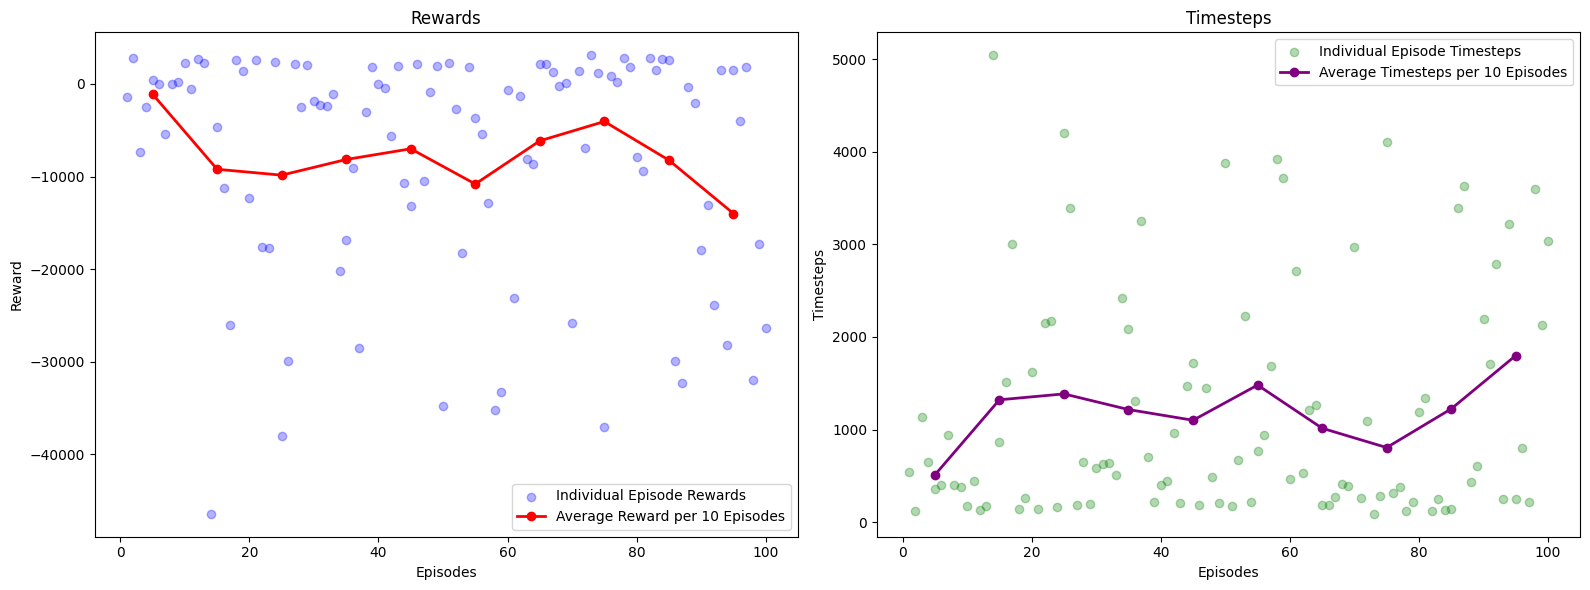

In [10]:
util.plot_test_dotplots(rewards=rewards, timesteps=timesteps, interval=10)

In [12]:
util.calculate_action_percentages(log_file=file_name)

Total actions across 100 episodes: 118515
Action -1: 0.0%
Action 0: 100.0%
Action 1: 0.0%


In [13]:
util.calculate_clearance_rate_percentages(log_file=file_name)

Total timesteps across 100 episodes (including initial states): 118615
Lane 1:
  100.0% of timesteps had a clearance rate less than 5
  100.0% of timesteps had a clearance rate less than 10
Lane 2:
  100.0% of timesteps had a clearance rate less than 5
  100.0% of timesteps had a clearance rate less than 10
Lane 3:
  97.4% of timesteps had a clearance rate less than 5
  98.9% of timesteps had a clearance rate less than 10
Lane 4:
  100.0% of timesteps had a clearance rate less than 5
  100.0% of timesteps had a clearance rate less than 10
Lane 5:
  92.5% of timesteps had a clearance rate less than 5
  95.7% of timesteps had a clearance rate less than 10
